# Import of libraries

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import PIL.Image
import tensorflow as tf
import os



# Loading DataSet cats and dogs 

In [104]:
# File Path
IMAGES_CATS_FOLDER_PATH = "./dogs-vs-cats/train/cats/"
IMAGE_DOGS_FOLDER_PATH = "./dogs-vs-cats/train/dogs/"

FILE_PATH_IMAGES_CATS_DOGS = [ 
            os.path.join(IMAGES_CATS_FOLDER_PATH,i) for i in os.listdir(IMAGES_CATS_FOLDER_PATH)
        ] +  [
        os.path.join(IMAGE_DOGS_FOLDER_PATH,i) for i in os.listdir(IMAGE_DOGS_FOLDER_PATH)] 

# Labels
labels=[i for i in os.listdir(IMAGES_CATS_FOLDER_PATH)] + [i for i in os.listdir(IMAGE_DOGS_FOLDER_PATH)]

# Targets
targets=[i.split('.')[0] for i in labels]
y=targets

# Dataframe
data = pd.DataFrame({'PATH':FILE_PATH_IMAGES_CATS_DOGS,'targets':targets}) 
data

PATH targets
0         ./dogs-vs-cats/train/cats/cat.0.jpg     cat
1         ./dogs-vs-cats/train/cats/cat.1.jpg     cat
2        ./dogs-vs-cats/train/cats/cat.10.jpg     cat
3       ./dogs-vs-cats/train/cats/cat.100.jpg     cat
4      ./dogs-vs-cats/train/cats/cat.1000.jpg     cat
...                                       ...     ...
24995  ./dogs-vs-cats/train/dogs/dog.9995.jpg     dog
24996  ./dogs-vs-cats/train/dogs/dog.9996.jpg     dog
24997  ./dogs-vs-cats/train/dogs/dog.9997.jpg     dog
24998  ./dogs-vs-cats/train/dogs/dog.9998.jpg     dog
24999  ./dogs-vs-cats/train/dogs/dog.9999.jpg     dog

[25000 rows x 2 columns]

In [105]:
print("total data counts:", data['targets'].count())
counts = data['targets'].value_counts()
print(counts)


total data counts: 25000
cat    12500
dog    12500
Name: targets, dtype: int64


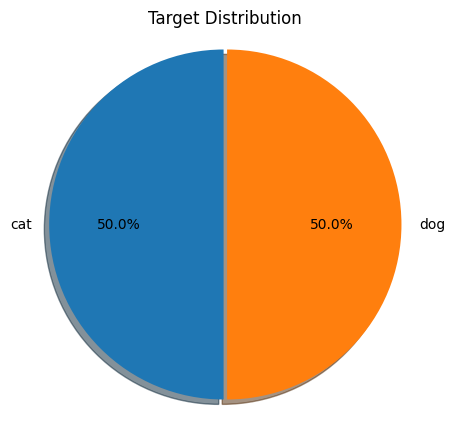

In [106]:
label_count=data['targets'].value_counts()
explode = (0.01,0.01)  

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(label_count.values, explode=explode, labels=label_count.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Target Distribution')
plt.show()

## Train-Validation Split


In [179]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(data, test_size=0.20, random_state=42)
# train_df, val_df = train_test_split(data, test_size=0.40, random_state=42)
# train_df, val_df = train_test_split(data, test_size=0.50, random_state=42)
val_df

PATH targets
6868     ./dogs-vs-cats/train/cats/cat.493.jpg     cat
24016   ./dogs-vs-cats/train/dogs/dog.9112.jpg     dog
9668     ./dogs-vs-cats/train/cats/cat.745.jpg     cat
13640  ./dogs-vs-cats/train/dogs/dog.11022.jpg     dog
14018  ./dogs-vs-cats/train/dogs/dog.11363.jpg     dog
...                                        ...     ...
8670    ./dogs-vs-cats/train/cats/cat.6551.jpg     cat
11839   ./dogs-vs-cats/train/cats/cat.9403.jpg     cat
4013     ./dogs-vs-cats/train/cats/cat.236.jpg     cat
21147   ./dogs-vs-cats/train/dogs/dog.6530.jpg     dog
695    ./dogs-vs-cats/train/cats/cat.10622.jpg     cat

[5000 rows x 2 columns]

In [180]:
class_id_distributionTrain = val_df['targets'].value_counts()
print(class_id_distributionTrain)
val_df

cat    2515
dog    2485
Name: targets, dtype: int64


PATH targets
6868     ./dogs-vs-cats/train/cats/cat.493.jpg     cat
24016   ./dogs-vs-cats/train/dogs/dog.9112.jpg     dog
9668     ./dogs-vs-cats/train/cats/cat.745.jpg     cat
13640  ./dogs-vs-cats/train/dogs/dog.11022.jpg     dog
14018  ./dogs-vs-cats/train/dogs/dog.11363.jpg     dog
...                                        ...     ...
8670    ./dogs-vs-cats/train/cats/cat.6551.jpg     cat
11839   ./dogs-vs-cats/train/cats/cat.9403.jpg     cat
4013     ./dogs-vs-cats/train/cats/cat.236.jpg     cat
21147   ./dogs-vs-cats/train/dogs/dog.6530.jpg     dog
695    ./dogs-vs-cats/train/cats/cat.10622.jpg     cat

[5000 rows x 2 columns]

<BarContainer object of 2 artists>

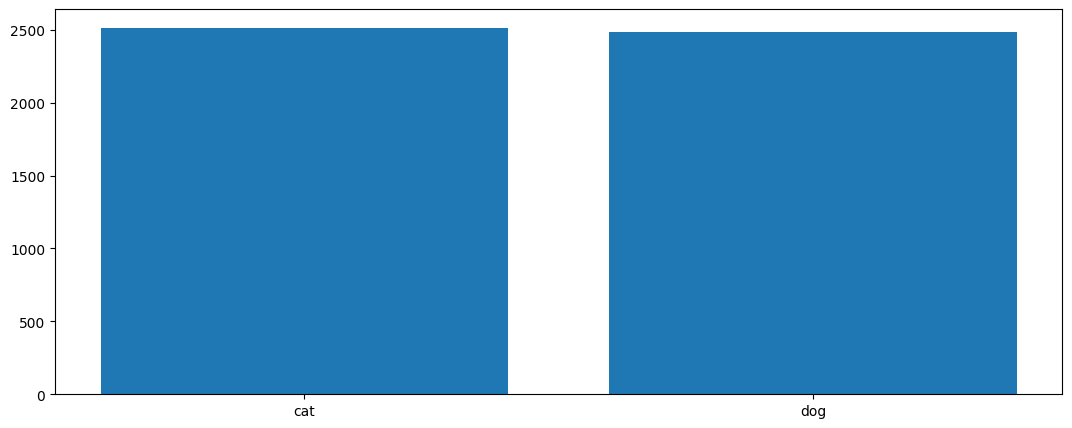

In [181]:
plt.figure(figsize=(13,5))
plt.xticks(np.arange(43))
plt.bar(class_id_distributionTrain.index, class_id_distributionTrain.values)

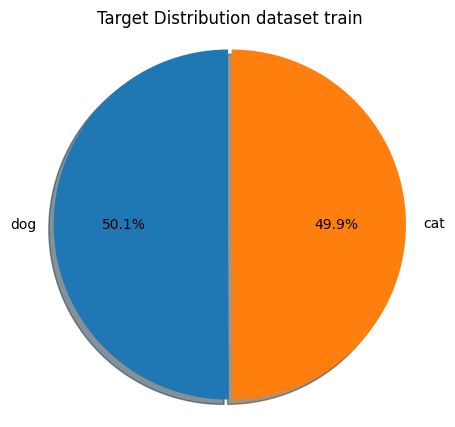

In [182]:
label_count=train_df['targets'].value_counts()
explode = (0.01,0.01)  

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(label_count.values, explode=explode, labels=label_count.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Target Distribution dataset train')
plt.show()

In [183]:
class_id_distributionTest = val_df['targets'].value_counts()
class_id_distributionTest.head(10)

cat    2515
dog    2485
Name: targets, dtype: int64

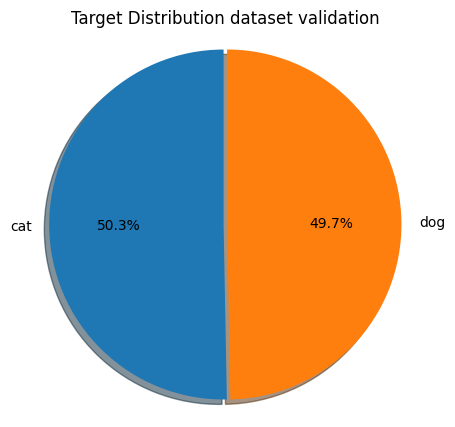

In [159]:
label_count=val_df['targets'].value_counts()
explode = (0.01,0.01)  

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(label_count.values, explode=explode, labels=label_count.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Target Distribution dataset validation')
plt.show()

## Displaying Images


In [184]:
def get_lists_path(target :str ) -> list:
    """
        **target** : cat or dog 
    """
    return [path_img for path_img, class_name in zip(list(data['PATH']),list(data['targets'])) if(target == class_name)]
len(get_lists_path("cat"))


12500

12500


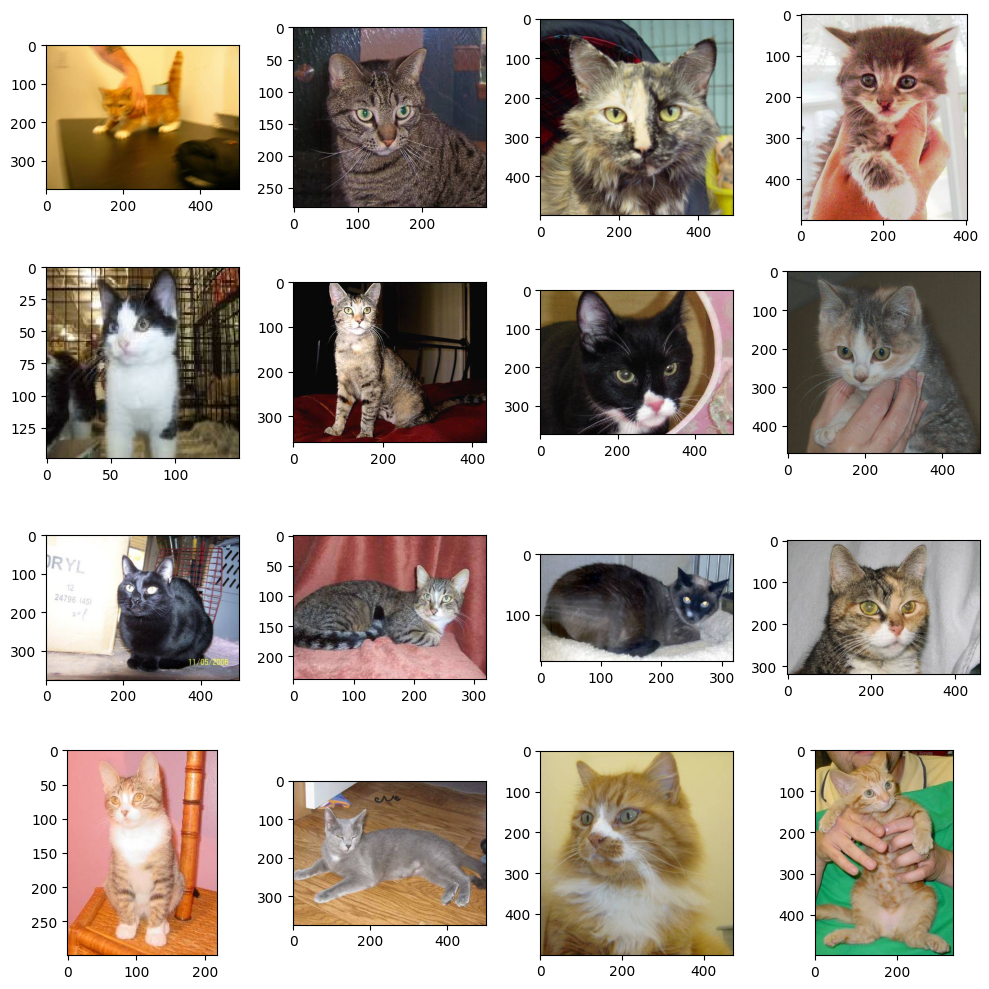

In [185]:
import matplotlib.image as img

def display_images(target : str, rows = 4,  cols = 4): 
    axes, lists_path= [] , get_lists_path(target)
    print(len(lists_path))
    fig=plt.figure(figsize=(10,10))
    i = 0
    for a in range(rows*cols):
        b = img.imread(lists_path[i])
        axes.append(fig.add_subplot(rows,cols,a+1))
        plt.imshow(b)
        i+=1
    fig.tight_layout()
    plt.show()
# display_images(target="dog")
display_images(target="cat")

## Creating and Visualize model


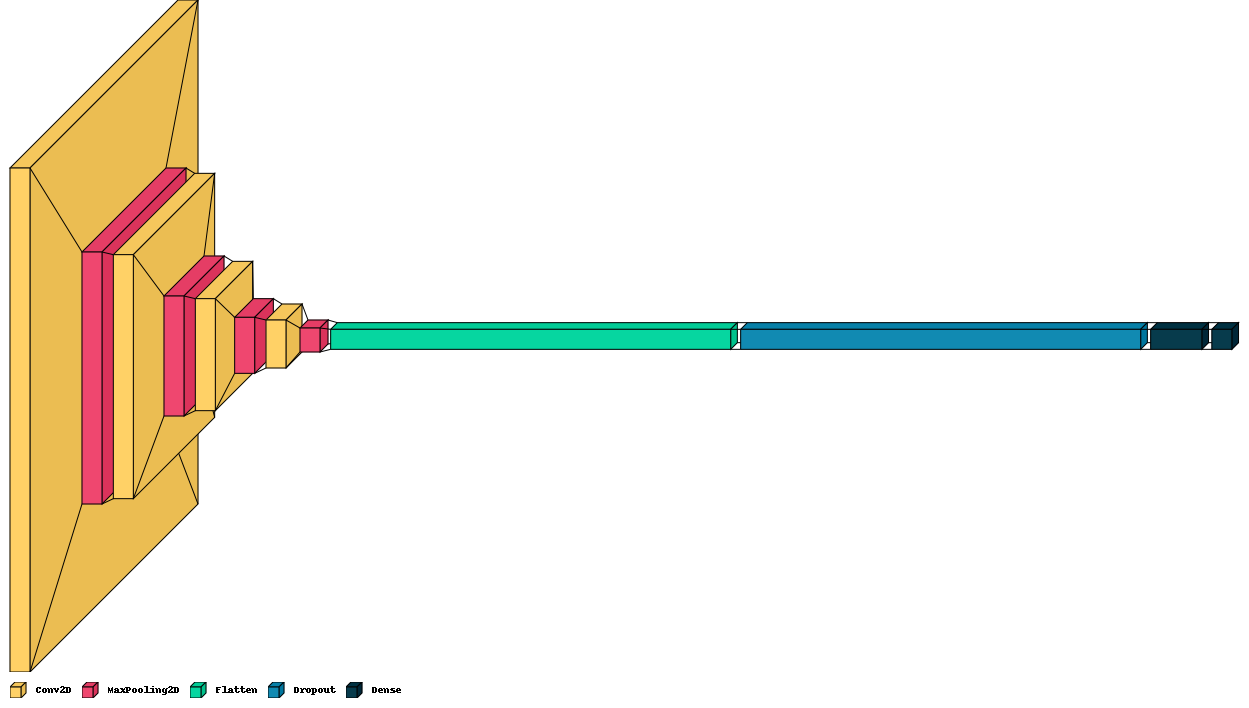

In [186]:
import visualkeras
from keras.layers import Conv2D, LeakyReLU, MaxPool2D, Dropout, Dense, Flatten
from keras.models import Sequential
WIDTH,HEIGHT = 128,128

def get_model(num_model : int, activation : str = "relu", 
            optimizers : str = "adam", learning_rate : float = 0.001) -> Sequential : 
    model = Sequential()
    if num_model == 1 :
        if activation != "LeakyReLU" :
            model.add(Conv2D(32, kernel_size=(3,3), input_shape=(WIDTH, HEIGHT, 3), activation=activation))
            model.add(MaxPool2D(pool_size=2))
            model.add(Conv2D(64, kernel_size=(3,3), activation = activation))
            model.add(MaxPool2D(pool_size=2))
            model.add(Conv2D(128, kernel_size=(3,3), activation = activation))
            model.add(MaxPool2D(pool_size=2))
            model.add(Flatten())
            model.add(Dense(512, activation=activation))
            model.add(Dense(1, activation='sigmoid'))
        else: 
            model.add(Conv2D(32, kernel_size=(3,3), input_shape=(WIDTH, HEIGHT, 3)))
            model.add(LeakyReLU())
            model.add(MaxPool2D(pool_size=2))
            model.add(Conv2D(64, kernel_size=(3,3)))
            model.add(LeakyReLU())
            model.add(MaxPool2D(pool_size=2))
            model.add(Conv2D(128, kernel_size=(3,3)))
            model.add(LeakyReLU())
            model.add(MaxPool2D(pool_size=2))
            model.add(Flatten())
            model.add(Dense(512))
            model.add(LeakyReLU())
            model.add(Dense(1, activation='sigmoid'))
    elif num_model == 2:         
        if activation != "LeakyReLU" :
            model.add(Conv2D(32, kernel_size=(3,3), input_shape=(WIDTH, HEIGHT, 3), activation=activation))
            model.add(Conv2D(64, kernel_size=(3,3), activation = activation))
            model.add(MaxPool2D(pool_size=2))
            model.add(Dropout(0.25))
            model.add(Flatten())
            model.add(Dense(128, activation=activation))
            model.add(Dropout(0.5))
            model.add(Dense(1, activation='sigmoid'))
        else : 
            model.add(Conv2D(32, kernel_size=(3,3), input_shape=(WIDTH, HEIGHT, 3)))
            model.add(LeakyReLU())
            model.add(Conv2D(64, kernel_size=(3,3)))
            model.add(LeakyReLU())
            model.add(MaxPool2D(pool_size=2))
            model.add(Dropout(0.25))
            model.add(Flatten())
            model.add(Dense(128))
            model.add(LeakyReLU())
            model.add(Dropout(0.5))
            model.add(Dense(1, activation='sigmoid'))
         
    elif num_model == 3: 
        if activation != "LeakyReLU" :
            model.add(Conv2D(32, kernel_size=(3,3), input_shape=(WIDTH, HEIGHT, 3), activation=activation))
            model.add(MaxPool2D(pool_size=2))
            model.add(Conv2D(64, kernel_size=(3,3), activation = activation))
            model.add(MaxPool2D(pool_size=2))
            model.add(Conv2D(128, kernel_size=(3,3), activation = activation))
            model.add(MaxPool2D(pool_size=2))
            model.add(Conv2D(128, kernel_size=(3,3), activation = activation))
            model.add(MaxPool2D(pool_size=2))
            model.add(Flatten())
            model.add(Dropout(0.25))
            model.add(Dense(512, activation=activation))
            model.add(Dense(1, activation='sigmoid'))
        else: 
            model.add(Conv2D(32, kernel_size=(3,3), input_shape=(WIDTH, HEIGHT, 3)))
            model.add(LeakyReLU())
            model.add(MaxPool2D(pool_size=2))
            model.add(Conv2D(64, kernel_size=(3,3)))
            model.add(LeakyReLU())
            model.add(MaxPool2D(pool_size=2))
            model.add(Conv2D(128, kernel_size=(3,3)))
            model.add(LeakyReLU())
            model.add(MaxPool2D(pool_size=2))
            model.add(Conv2D(128, kernel_size=(3,3)))
            model.add(LeakyReLU())
            model.add(MaxPool2D(pool_size=2))
            model.add(Flatten())
            model.add(Dropout(0.50))
            model.add(Dense(512))
            model.add(LeakyReLU())
            model.add(Dense(1, activation='sigmoid'))

    if optimizers == 'adam': 
        model.compile(loss='binary_crossentropy',
                    optimizer=tf.keras.optimizers.Adam(learning_rate),
                    metrics=['accuracy']
                    )
    elif optimizers == 'RMSprop' : 
        model.compile(loss='binary_crossentropy',
                    optimizer=tf.keras.optimizers.RMSprop(learning_rate),
                    metrics=['accuracy']
                    )
    elif optimizers == 'Adamax': 
        model.compile(loss='binary_crossentropy',
                    optimizer=tf.keras.optimizers.Adamax(learning_rate),
                    metrics=['accuracy']
                    )
    # Callbacks
    val_loss_not_improve = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
    val_accuracy_not_improve=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
    call_backs = [val_loss_not_improve,val_accuracy_not_improve]

    return model
    
# model = get_model(num_model=1,activation="relu",optimizers='adam',learning_rate=0.001)
# model = get_model(num_model=1,activation="elu",optimizers='RMSprop',learning_rate=0.1)
# model = get_model(num_model=1,activation="LeakyReLU",optimizers='Adamax',learning_rate=0.01)

# model = get_model(num_model=2,activation="relu",optimizers='adam',learning_rate=0.001)
# model = get_model(num_model=2,activation="elu",optimizers='RMSprop',learning_rate=0.1)
# model = get_model(num_model=2,activation="LeakyReLU",optimizers='Adamax',learning_rate=0.01)

model = get_model(3,activation="relu",optimizers='adam',learning_rate=0.001)
# model = get_model(3,activation="elu",optimizers='RMSprop',learning_rate=0.1)
# model = get_model(3,activation="LeakyReLU",optimizers='Adamax',learning_rate=0.01)

# model.summary()
visualkeras.layered_view(model, legend=True) 

## Generation of batches of images that contain normalised data.


In [187]:
from keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(rescale=1./255,)


Xy_train=datagen.flow_from_dataframe(dataframe=train_df,
                                     x_col="PATH",
                                     y_col="targets",
                                     target_size=(WIDTH, HEIGHT),
                                     class_mode="binary")

Xy_val=datagen.flow_from_dataframe(dataframe=val_df,
                                     x_col="PATH",
                                     y_col="targets",
                                     target_size=(WIDTH, HEIGHT),
                                     class_mode="binary")                  

Xy_val.class_indices

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


{'cat': 0, 'dog': 1}

## Trains the model


In [188]:
history = model.fit(Xy_train, 
                    # epochs=20, 
                    epochs=25, 
                    # epochs=30, 
                    # callbacks=call_backs,
                    validation_data=Xy_val,
                    workers=4
                    )

Epoch 1/25
625/625 [==============================] - 30s 46ms/step - loss: 0.6029 - accuracy: 0.6654 - val_loss: 0.5387 - val_accuracy: 0.7252
Epoch 2/25
625/625 [==============================] - 30s 47ms/step - loss: 0.4665 - accuracy: 0.7807 - val_loss: 0.4037 - val_accuracy: 0.8134
Epoch 3/25
625/625 [==============================] - 32s 51ms/step - loss: 0.3797 - accuracy: 0.8311 - val_loss: 0.3471 - val_accuracy: 0.8468
Epoch 4/25
625/625 [==============================] - 32s 51ms/step - loss: 0.3084 - accuracy: 0.8658 - val_loss: 0.2955 - val_accuracy: 0.8698
Epoch 5/25
625/625 [==============================] - 31s 50ms/step - loss: 0.2497 - accuracy: 0.8943 - val_loss: 0.2796 - val_accuracy: 0.8836
Epoch 6/25
625/625 [==============================] - 31s 49ms/step - loss: 0.2029 - accuracy: 0.9154 - val_loss: 0.3058 - val_accuracy: 0.8736
Epoch 7/25
625/625 [==============================] - 31s 49ms/step - loss: 0.1695 - accuracy: 0.9272 - val_loss: 0.2926 - val_accuracy:

## Plotting loss and accuracy


Maximum accuracy : 0.9114000201225281


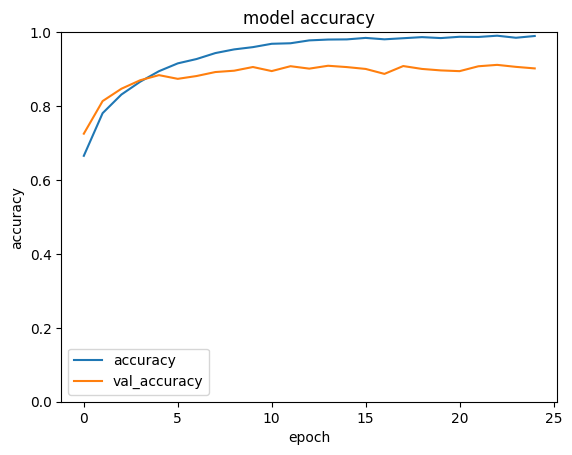

In [189]:
# summarize history for accuracy
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
print("Maximum accuracy : {}".format(history_df['val_accuracy'].max()))
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim([0, 1])
plt.show()

Minimum validation loss: 0.030684515833854675


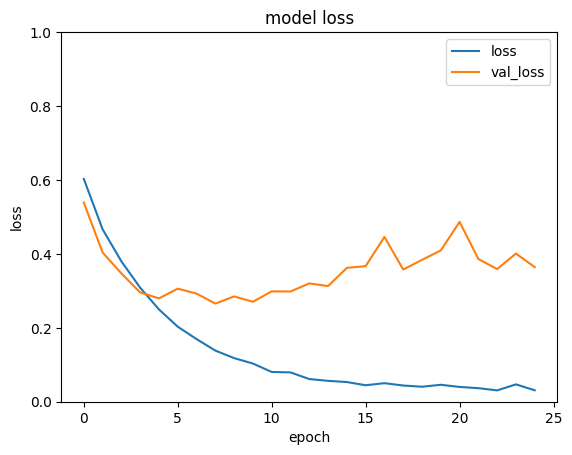

In [191]:
# summarize history for accuracy
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum validation loss: {}".format(history_df['loss'].min()))
plt.title('model loss')
plt.ylabel('loss')
plt.ylim([0, 1])
plt.xlabel('epoch')
plt.show()

## Prediction on validation data


In [192]:
pred = model.predict(Xy_val)
class_map = { v: k for k, v in Xy_val.class_indices.items() }
predict = tf.nn.sigmoid(pred)
predict = tf.where(pred < 0.5, 0, 1).numpy()
predict

157/157 [==============================] - 10s 61ms/step


array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [193]:
val_df['predict']= ['cat' if x==0 else 'dog' for x in predict] 
val_df

PATH targets predict
6868     ./dogs-vs-cats/train/cats/cat.493.jpg     cat     cat
24016   ./dogs-vs-cats/train/dogs/dog.9112.jpg     dog     cat
9668     ./dogs-vs-cats/train/cats/cat.745.jpg     cat     dog
13640  ./dogs-vs-cats/train/dogs/dog.11022.jpg     dog     cat
14018  ./dogs-vs-cats/train/dogs/dog.11363.jpg     dog     dog
...                                        ...     ...     ...
8670    ./dogs-vs-cats/train/cats/cat.6551.jpg     cat     dog
11839   ./dogs-vs-cats/train/cats/cat.9403.jpg     cat     cat
4013     ./dogs-vs-cats/train/cats/cat.236.jpg     cat     dog
21147   ./dogs-vs-cats/train/dogs/dog.6530.jpg     dog     cat
695    ./dogs-vs-cats/train/cats/cat.10622.jpg     cat     dog

[5000 rows x 3 columns]

## Confusion Matrix


In [194]:
class_id_distributionTest = val_df['targets'].value_counts()
class_id_distributionTest.head(10)
val_df

PATH targets predict
6868     ./dogs-vs-cats/train/cats/cat.493.jpg     cat     cat
24016   ./dogs-vs-cats/train/dogs/dog.9112.jpg     dog     cat
9668     ./dogs-vs-cats/train/cats/cat.745.jpg     cat     dog
13640  ./dogs-vs-cats/train/dogs/dog.11022.jpg     dog     cat
14018  ./dogs-vs-cats/train/dogs/dog.11363.jpg     dog     dog
...                                        ...     ...     ...
8670    ./dogs-vs-cats/train/cats/cat.6551.jpg     cat     dog
11839   ./dogs-vs-cats/train/cats/cat.9403.jpg     cat     cat
4013     ./dogs-vs-cats/train/cats/cat.236.jpg     cat     dog
21147   ./dogs-vs-cats/train/dogs/dog.6530.jpg     dog     cat
695    ./dogs-vs-cats/train/cats/cat.10622.jpg     cat     dog

[5000 rows x 3 columns]

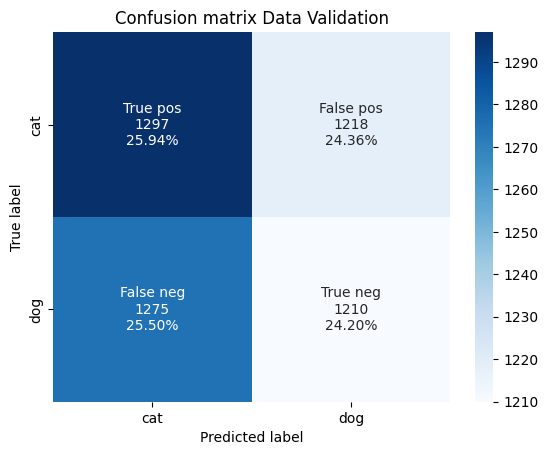

In [260]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    if figsize==None:
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        categories=False

    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

    if title:
        plt.title(title)


cf_matrix = confusion_matrix(val_df["targets"],val_df["predict"])
make_confusion_matrix(cf_matrix, 
                      title="Confusion matrix Data Validation",
                      group_names=["True pos","False pos","False neg","True neg"], 
                      categories=["cat","dog"], 
                      )


In [70]:
error_df=[row['PATH'] for i,row in val_df.iterrows() if row["targets"] != row['predict']]
len(error_df)

2494

## Prediction on test data

In [244]:


IMAGE_CATS_FOLDER_PATH = "./dogs-vs-cats/test1/cats/"
IMAGE_DOGS_FOLDER_PATH = "./dogs-vs-cats/test1/dogs/"

FILE_PATH = [os.path.join(IMAGE_CATS_FOLDER_PATH,i) for i in os.listdir(IMAGE_CATS_FOLDER_PATH)] + [
    os.path.join(IMAGE_DOGS_FOLDER_PATH,i) for i in os.listdir(IMAGE_DOGS_FOLDER_PATH)] 
print(FILE_PATH[0])
targets=[i.split('/')[3][:-1] for i in FILE_PATH]
print(targets[0])
# Dataframe
test_df = pd.DataFrame({'PATH':FILE_PATH, 'targets' : targets}) 
test_df

./dogs-vs-cats/test1/cats/10.jpg
cat


PATH targets
0     ./dogs-vs-cats/test1/cats/10.jpg     cat
1    ./dogs-vs-cats/test1/cats/100.jpg     cat
2    ./dogs-vs-cats/test1/cats/101.jpg     cat
3    ./dogs-vs-cats/test1/cats/103.jpg     cat
4    ./dogs-vs-cats/test1/cats/104.jpg     cat
..                                 ...     ...
155   ./dogs-vs-cats/test1/dogs/88.jpg     dog
156   ./dogs-vs-cats/test1/dogs/94.jpg     dog
157   ./dogs-vs-cats/test1/dogs/95.jpg     dog
158   ./dogs-vs-cats/test1/dogs/97.jpg     dog
159   ./dogs-vs-cats/test1/dogs/98.jpg     dog

[160 rows x 2 columns]

In [245]:
Xy_test=datagen.flow_from_dataframe(dataframe=test_df,
                                     x_col="PATH",
                                     y_col=None,
                                     shuffle=False,
                                     target_size=(WIDTH, HEIGHT),
                                     class_mode=None)
Xy_test

Found 160 validated image filenames.


In [247]:
import numpy as np
pred=model.predict(Xy_test) 


5/5 [==============================] - 0s 72ms/step


In [248]:
predict = tf.nn.sigmoid(pred)
predict = tf.where(pred < 0.5, 0, 1).numpy()

test_df['test_predict']= ['cat' if x==0 else 'dog' for x in predict] 
test_df.head(20)


PATH targets test_predict
0    ./dogs-vs-cats/test1/cats/10.jpg     cat          cat
1   ./dogs-vs-cats/test1/cats/100.jpg     cat          dog
2   ./dogs-vs-cats/test1/cats/101.jpg     cat          cat
3   ./dogs-vs-cats/test1/cats/103.jpg     cat          cat
4   ./dogs-vs-cats/test1/cats/104.jpg     cat          cat
5   ./dogs-vs-cats/test1/cats/107.jpg     cat          cat
6   ./dogs-vs-cats/test1/cats/108.jpg     cat          cat
7    ./dogs-vs-cats/test1/cats/11.jpg     cat          cat
8   ./dogs-vs-cats/test1/cats/114.jpg     cat          cat
9   ./dogs-vs-cats/test1/cats/115.jpg     cat          cat
10  ./dogs-vs-cats/test1/cats/116.jpg     cat          cat
11  ./dogs-vs-cats/test1/cats/117.jpg     cat          cat
12  ./dogs-vs-cats/test1/cats/120.jpg     cat          cat
13  ./dogs-vs-cats/test1/cats/121.jpg     cat          dog
14  ./dogs-vs-cats/test1/cats/122.jpg     cat          cat
15  ./dogs-vs-cats/test1/cats/123.jpg     cat          cat
16  ./dogs-vs-cats/test1/cats/124.jpg     cat          cat
17  ./dogs-vs-cats/test1/cats/125.jpg     cat          cat
18  ./dogs-vs-cats/test1/cats/128.jpg     cat          cat
19  ./dogs-vs-cats/test1/cats/129.jpg     cat          cat

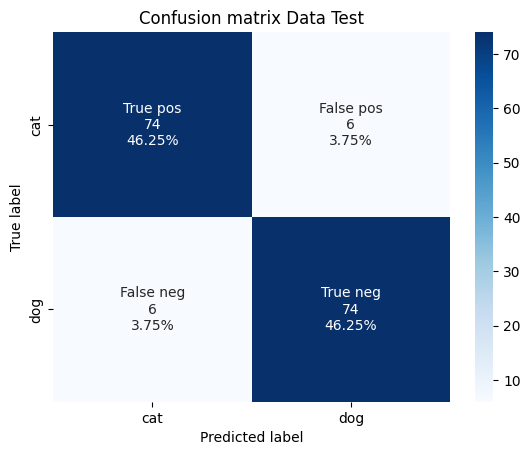

In [261]:
cf_matrix = confusion_matrix(test_df["targets"],test_df["test_predict"])

make_confusion_matrix(cf_matrix, 
                      title="Confusion matrix Data Test",
                      group_names=["True pos","False pos","False neg","True neg"], 
                      categories=["cat","dog"], 
                      )
